PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [43]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (2).csv


In [44]:
ff=pd.read_csv("forestfires.csv")
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [45]:
ff.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [46]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [47]:
ff[ff.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [48]:
ff[ff.duplicated()].shape

(8, 31)

In [49]:
ff1=ff.drop_duplicates()

In [50]:
ff1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [51]:
ff2=ff1.drop(ff1.columns[10:30],axis=1)

In [52]:
ff2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [53]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
ff2['size_category']=label_encoder.fit_transform(ff2['size_category'])

In [54]:
ff2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [55]:
ff2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
ff2.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

In [56]:
ff2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [57]:
import warnings
warnings.filterwarnings('ignore')

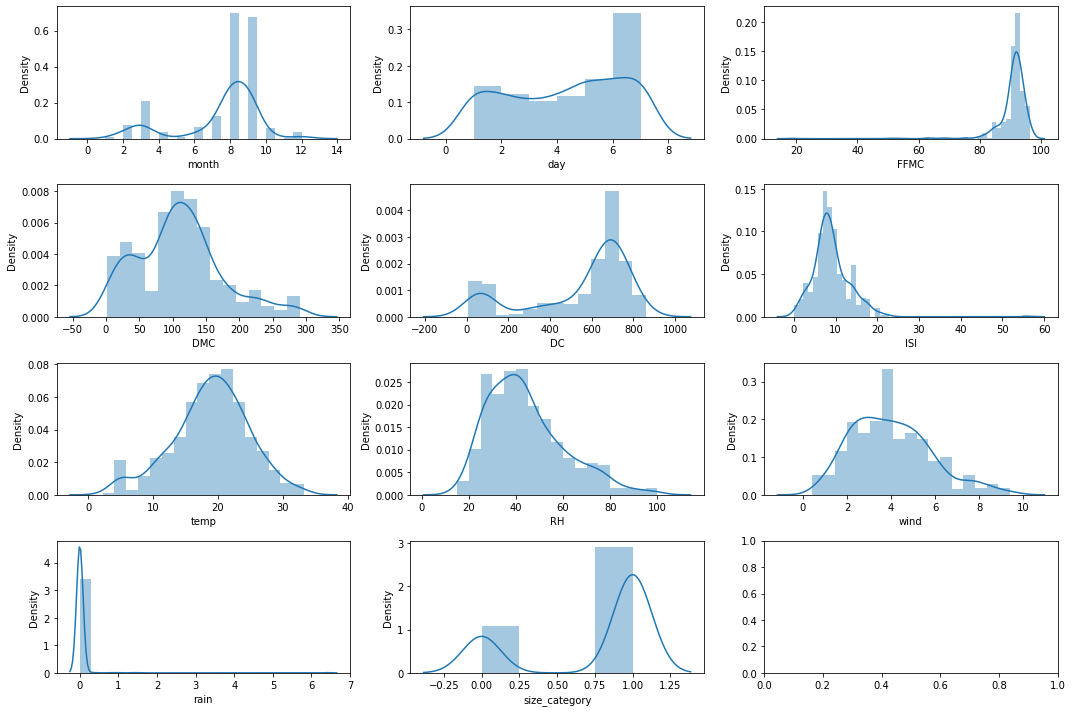

In [58]:
fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.distplot(ff2.month,ax=ax[0,0])
sns.distplot(ff2.day,ax=ax[0,1])
sns.distplot(ff2.FFMC,ax=ax[0,2])
sns.distplot(ff2.DMC,ax=ax[1,0])
sns.distplot(ff2.DC,ax=ax[1,1])
sns.distplot(ff2.ISI,ax=ax[1,2])
sns.distplot(ff2.temp,ax=ax[2,0])
sns.distplot(ff2.RH,ax=ax[2,1])
sns.distplot(ff2.wind,ax=ax[2,2])
sns.distplot(ff2.rain,ax=ax[3,0])
sns.distplot(ff2['size_category'],ax=ax[3,1])

plt.tight_layout()
plt.show()

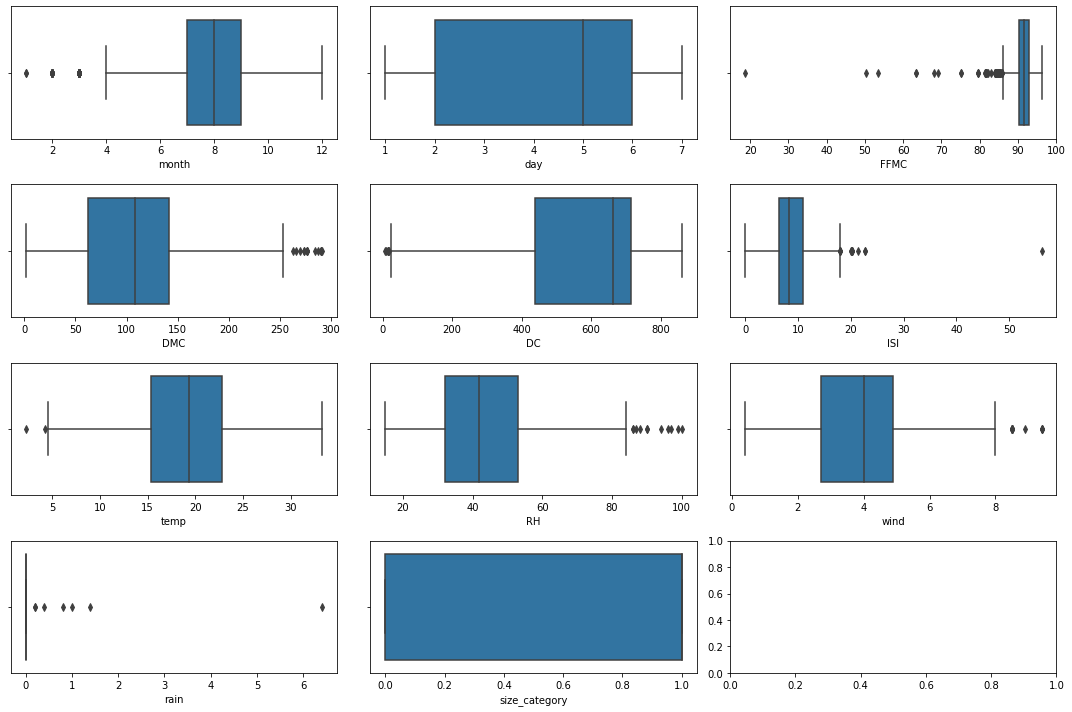

In [59]:
fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.boxplot(ff2.month,ax=ax[0,0])
sns.boxplot(ff2.day,ax=ax[0,1])
sns.boxplot(ff2.FFMC,ax=ax[0,2])
sns.boxplot(ff2.DMC,ax=ax[1,0])
sns.boxplot(ff2.DC,ax=ax[1,1])
sns.boxplot(ff2.ISI,ax=ax[1,2])
sns.boxplot(ff2.temp,ax=ax[2,0])
sns.boxplot(ff2.RH,ax=ax[2,1])
sns.boxplot(ff2.wind,ax=ax[2,2])
sns.boxplot(ff2.rain,ax=ax[3,0])
sns.boxplot(ff2['size_category'],ax=ax[3,1])

plt.tight_layout()
plt.show()

**Now extracting Independant & Dependant variables**

In [60]:
X=ff2.iloc[:,0:10].values
Y=ff2.iloc[:,-1].values

In [61]:
X

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [62]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
seed=7
np.random.seed(seed)

In [71]:
model=Sequential()
model.add(Dense(12,input_dim=10,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='linear'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [72]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [73]:
model.fit(X,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 0.2138 - accuracy: 0.7361 - val_loss: 0.2447 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.7566 - val_loss: 0.2411 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1883 - accuracy: 0.7566 - val_loss: 0.2367 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1872 - accuracy: 0.7566 - val_loss: 0.2405 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1849 - accuracy: 0.7566 - val_loss: 0.2304 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1843 - accuracy: 0.7566 - val_loss: 0.2322 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1859 - accuracy: 0.7566 - val_loss: 0.2494 - val_accuracy: 0.6726
Epoch 8/100
3

In [74]:
 scores=model.evaluate(X,Y)
 print('%s: %.2f%%' % (model.metrics_names[1],scores[1]*scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.7289
accuracy: 53.13%


In [75]:
history=model.fit(X,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1771 - accuracy: 0.7566 - val_loss: 0.2345 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1776 - accuracy: 0.7683 - val_loss: 0.2377 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1791 - accuracy: 0.7654 - val_loss: 0.2289 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.7683 - val_loss: 0.2430 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 0.1781 - accuracy: 0.7625 - val_loss: 0.2290 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1767 - accuracy: 0.7683 - val_loss: 0.2444 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1772 - accuracy: 0.7683 - val_loss: 0.2358 - val_accuracy: 0.6726
Epoch 8/100
3

In [76]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

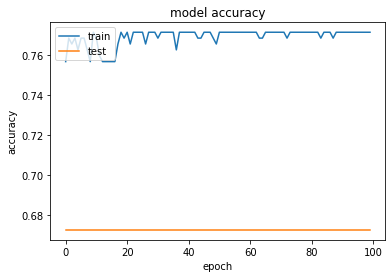

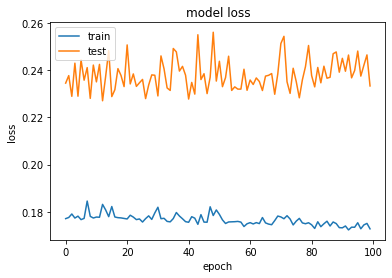

In [77]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [79]:
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='linear'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse',optimizer=adam,metrics=['accuracy'])
    return model

In [81]:
#Create a model
model=KerasClassifier(build_fn=create_model,verbose=0)
#Define grid search parameters
batch_size=[10,20,40]
epochs=[10,50,100]
#Make a directory of grid search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   1.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.765 total time=   1.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.510 total time=   1.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.676 total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.693 total time=   1.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,